### Data Overview
Columns:
- name - The name of the country.

- area - The total land and sea area of the country.

- population - The country's population.

- population_growth- The country's population growth as a percentage.

- birth_rate - The country's birth rate, or the number of births a year per 1,000 people.

- death_rate - The country's death rate, or the number of death a year per 1,000 people.

- area- The country's total area (both land and water).

- area_land - The country's land area in square kilometers.

- area_water - The country's waterarea in square kilometers.

In [1]:
import sqlite3
import pandas as pd

In [2]:
conn = sqlite3.connect("data/factbook.db")

q1 = "SELECT * FROM sqlite_master WHERE type='table';"
q2 = "select * from facts limit 5"

In [3]:
pd.read_sql_query(q1, conn)

,type,name,tbl_name,rootpage,sql
0,table,facts,facts,2,"CREATE TABLE ""facts"" (""id"" INTEGER PRIMARY KEY..."
1,table,sqlite_sequence,sqlite_sequence,3,"CREATE TABLE sqlite_sequence(name,seq)"


In [4]:
pd.read_sql_query(q2, conn)

,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate,created_at,updated_at
0,1,af,Afghanistan,652230,652230,0,32564342,2.32,38.57,13.89,1.51,2015-11-01 13:19:49.461734,2015-11-01 13:19:49.461734
1,2,al,Albania,28748,27398,1350,3029278,0.30,12.92,6.58,3.30,2015-11-01 13:19:54.431082,2015-11-01 13:19:54.431082
2,3,ag,Algeria,2381741,2381741,0,39542166,1.84,23.67,4.31,0.92,2015-11-01 13:19:59.961286,2015-11-01 13:19:59.961286
3,4,an,Andorra,468,468,0,85580,0.12,8.13,6.96,0.00,2015-11-01 13:20:03.659945,2015-11-01 13:20:03.659945
4,5,ao,Angola,1246700,1246700,0,19625353,2.78,38.78,11.49,0.46,2015-11-01 13:20:08.625072,2015-11-01 13:20:08.625072


### Summary Statistics
Write a single query that returns the:
- minimum population
- maximum population
- minimum population growth
- maximum population growth

In [5]:
query = ''' 
    select min(population) as min_pop,
    max(population) as max_pop,
    min(population_growth) as min_growth,
    max(population_growth) as max_growth
    from facts
'''
pd.read_sql_query(query, conn)

,min_pop,max_pop,min_growth,max_growth
0,0,7256490011,0.0,4.02


### Exploring Outliers
- Write a query that returns the countrie(s) with a population of 0.
- Write a query that returns the countrie(s) with a population of 7256490011.
- In a markdown cell, type up your observations on these rows.

In [6]:
query = '''
    select name from facts where population = 0
'''
pd.read_sql_query(query, conn)

,name
0,Antarctica


In [7]:
query = '''
    select name from facts where population = 7256490011
'''
pd.read_sql_query(query, conn)

,name
0,World


Neither antartica or world are countries. We should remove them from out table as they will skew the results of our analysis.

### Histograms

Using just the non-outlier rows, generate a 2 by 2 grid of histograms for the following columns:

- population
- population_growth
- birth_rate
- death_rate

/Users/neilturner/anaconda/envs/python3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2881: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  exec(code_obj, self.user_global_ns, self.user_ns)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1202ac828>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11da941d0>]], dtype=object)

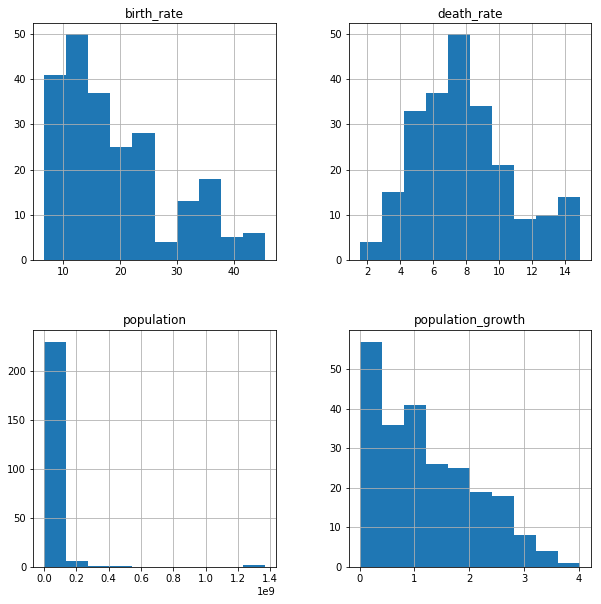

In [28]:
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(111)


query = """
    select population, population_growth, birth_rate, death_rate 
    from facts 
    where population != 7256490011 and population != 0
    """
pd.read_sql_query(query, conn).hist(ax=ax1)

